In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\HP\AppData\Local\Temp\ipykernel_10744\4167346307.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:

df = read_csv("usage.csv",names=['value'], header=0)
df.head()

,value
0,88
1,84
2,85
3,85
4,84


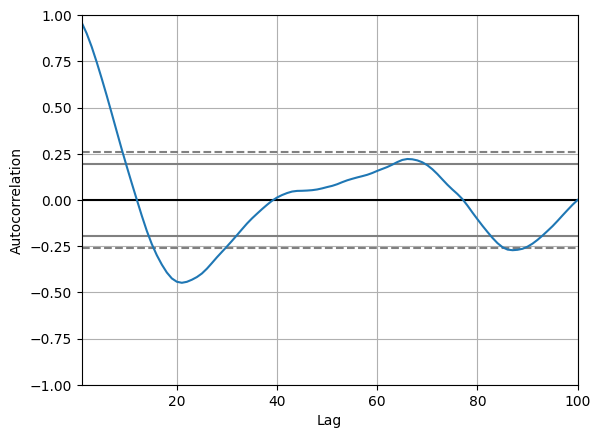

In [3]:
pd.plotting.autocorrelation_plot(df)
plt.show()

In [4]:
import statsmodels.api as sm

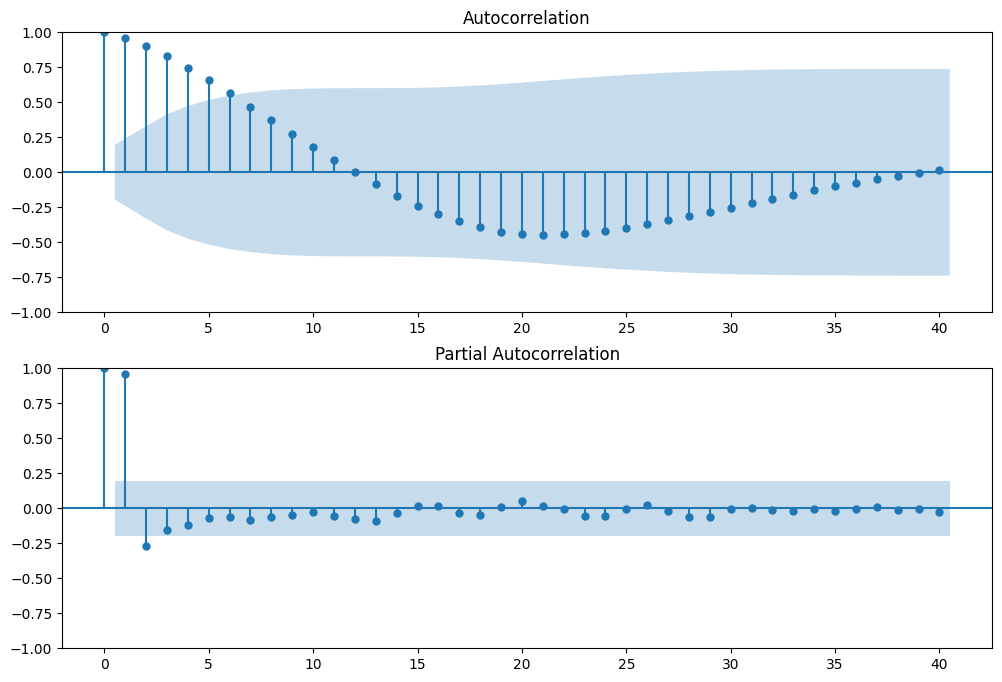

In [5]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,lags=40,ax=ax2)

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [7]:
autoarima_model = auto_arima(df, trace=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=525.569, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1024.556, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1277.994, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=534.021, Time=0.75 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=526.492, Time=0.47 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=529.901, Time=1.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=537.122, Time=1.88 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=564.487, Time=0.54 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=534.233, Time=0.99 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=528.287, Time=0.81 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=526.413, Time=2.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=531.096, Time=0.94 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total 

In [8]:
size = int(len(df) * 0.85)
train = df.value[:size]
test = df.value[size:]

In [17]:
model = ARIMA(train, order=(3,2,1))  
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.430
Date:                Sat, 06 Jan 2024   AIC                            438.860
Time:                        20:49:13   BIC                            450.954
Sample:                             0   HQIC                           443.719
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1359      0.132      8.606      0.000       0.877       1.395
ar.L2         -0.5875      0.151     -3.893      0.000      -0.883      -0.292
ar.L3          0.3019      0.128      2.357      0.0

In [18]:
# Get confidence intervals for the forecasts
forecast_steps = len(test) 
forecast_results = fitted.get_forecast(steps=forecast_steps)
forecast = fitted.forecast(steps=forecast_steps) 
conf_int = forecast_results.conf_int()  # Confidence intervals

In [19]:
lower_series = pd.Series(conf_int['lower value'], index=test.index)
upper_series = pd.Series(conf_int['upper value'], index=test.index)

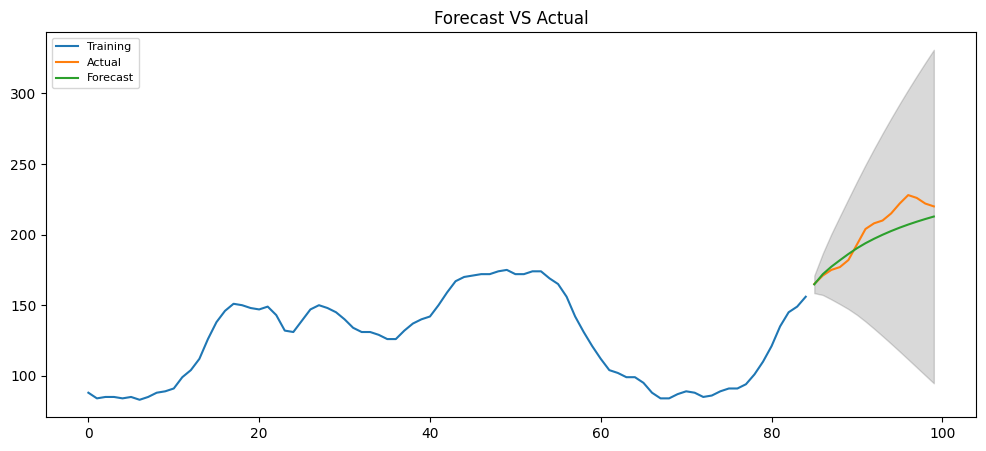

In [20]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [21]:
future_val=fitted.predict(start=101, end=120,type='levels')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

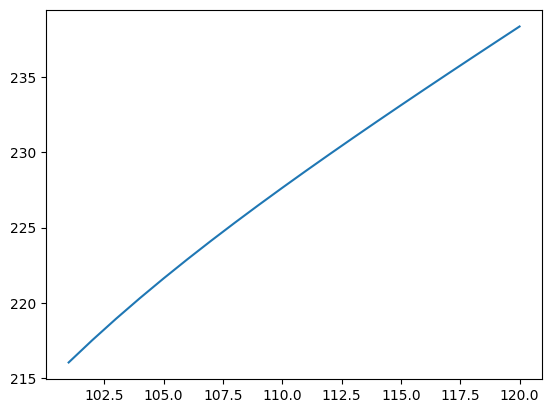

In [22]:
future_val.plot()